# MAST30034 Project 2
## Rental Prediction ---- Focusing on GLM with various families & Penalty Regression & Gradient Boosting Regressor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols, glm
import statistics

import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# Read the dataframe.

gpd_domain = pd.read_csv('../data/curated/df_model.csv')

In [3]:
gpd_domain

,Unnamed: 0,Unnamed: 0.1,name,Postcode,Prices,Bedrooms,Bathrooms,Parkings,geometry,SA2_code,...,Latitude,popu2022,popu2025,Income2022,Income2025,hos_count,stop_count,school_count,distance,pct
0,0,0,1/62 Simpson St East Melbourne VIC 3002,3002,395.0,1,1,0,POINT (144.9891076 -37.8106659),206041119,...,144.989108,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.640393,1.0
1,1,1,29/8 Wellington Crescent East Melbourne VIC 3002,3002,750.0,2,2,2,POINT (144.9776702 -37.8172238),206041119,...,144.977670,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.127094,1.0
2,2,2,811v/162 Albert Street East Melbourne VIC 3002,3002,600.0,2,1,1,POINT (144.9855313 -37.8100432),206041119,...,144.985531,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.317094,1.0
3,3,3,203/33 Cliveden Close East Melbourne VIC 3002,3002,380.0,1,1,1,POINT (144.9767157 -37.8171001),206041119,...,144.976716,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.993894,1.0
4,5,5,107K/211 Powlett Street East Melbourne VIC 3002,3002,550.0,1,1,1,POINT (144.9859936 -37.8096989),206041119,...,144.985994,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.114494,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,4902,4902,33 Ritchie Drive Clyde North VIC 3978,3978,450.0,4,2,2,POINT (145.3370537 -38.1137329),212031556,...,145.337054,28812.714834,103901.443821,69737.528612,76306.170584,0.0,0.0,1.0,54.314448,1.0
4539,4903,4903,8 Cropping Street Clyde North VIC 3978,3978,495.0,4,2,2,POINT (145.386116 -38.1042218),212031556,...,145.386116,28812.714834,103901.443821,69737.528612,76306.170584,0.0,0.0,1.0,56.476442,1.0
4540,4904,4904,37 Barley Crescent Clyde North VIC 3978,3978,470.0,4,2,2,POINT (145.3570598 -38.08415),212031555,...,145.357060,14034.992778,26309.739852,69737.528612,76306.170584,0.0,0.0,2.0,53.276851,1.0
4541,4905,4905,6 Viewbright Road Clyde North VIC 3978,3978,535.0,4,2,2,POINT (145.3545777 -38.0808423),212031555,...,145.354578,14034.992778,26309.739852,69737.528612,76306.170584,0.0,0.0,2.0,51.284857,1.0


In [4]:
gpd_domain.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
name             object
Postcode          int64
Prices          float64
Bedrooms          int64
Bathrooms         int64
Parkings          int64
geometry         object
SA2_code          int64
Longitude       float64
Latitude        float64
popu2022        float64
popu2025        float64
Income2022      float64
Income2025      float64
hos_count       float64
stop_count      float64
school_count    float64
distance        float64
pct             float64
dtype: object

1. Now split our dataframe into two parts, the 'train_df' with data in 2022, and the 'predict_df' with data in 2025.

In [5]:
# train_df (data in 2022).

train_df = gpd_domain.drop(['popu2025', 'Income2025'], axis=1)
train_df = train_df.rename({'popu2022': 'popu', 'Income2022': 'Income'}, axis=1)  

In [6]:
train_df

,Unnamed: 0,Unnamed: 0.1,name,Postcode,Prices,Bedrooms,Bathrooms,Parkings,geometry,SA2_code,Longitude,Latitude,popu,Income,hos_count,stop_count,school_count,distance,pct
0,0,0,1/62 Simpson St East Melbourne VIC 3002,3002,395.0,1,1,0,POINT (144.9891076 -37.8106659),206041119,-37.810666,144.989108,4965.669440,98664.943495,6.0,1.0,1.0,2.640393,1.0
1,1,1,29/8 Wellington Crescent East Melbourne VIC 3002,3002,750.0,2,2,2,POINT (144.9776702 -37.8172238),206041119,-37.817224,144.977670,4965.669440,98664.943495,6.0,1.0,1.0,2.127094,1.0
2,2,2,811v/162 Albert Street East Melbourne VIC 3002,3002,600.0,2,1,1,POINT (144.9855313 -37.8100432),206041119,-37.810043,144.985531,4965.669440,98664.943495,6.0,1.0,1.0,2.317094,1.0
3,3,3,203/33 Cliveden Close East Melbourne VIC 3002,3002,380.0,1,1,1,POINT (144.9767157 -37.8171001),206041119,-37.817100,144.976716,4965.669440,98664.943495,6.0,1.0,1.0,1.993894,1.0
4,5,5,107K/211 Powlett Street East Melbourne VIC 3002,3002,550.0,1,1,1,POINT (144.9859936 -37.8096989),206041119,-37.809699,144.985994,4965.669440,98664.943495,6.0,1.0,1.0,2.114494,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,4902,4902,33 Ritchie Drive Clyde North VIC 3978,3978,450.0,4,2,2,POINT (145.3370537 -38.1137329),212031556,-38.113733,145.337054,28812.714834,69737.528612,0.0,0.0,1.0,54.314448,1.0
4539,4903,4903,8 Cropping Street Clyde North VIC 3978,3978,495.0,4,2,2,POINT (145.386116 -38.1042218),212031556,-38.104222,145.386116,28812.714834,69737.528612,0.0,0.0,1.0,56.476442,1.0
4540,4904,4904,37 Barley Crescent Clyde North VIC 3978,3978,470.0,4,2,2,POINT (145.3570598 -38.08415),212031555,-38.084150,145.357060,14034.992778,69737.528612,0.0,0.0,2.0,53.276851,1.0
4541,4905,4905,6 Viewbright Road Clyde North VIC 3978,3978,535.0,4,2,2,POINT (145.3545777 -38.0808423),212031555,-38.080842,145.354578,14034.992778,69737.528612,0.0,0.0,2.0,51.284857,1.0


In [7]:
# predict_df (data in 2025).

predict_df = gpd_domain.drop(['popu2022', 'Income2022'], axis=1)
predict_df = predict_df.rename({'popu2025': 'popu', 'Income2025': 'Income'}, axis=1)

In [8]:
predict_df

,Unnamed: 0,Unnamed: 0.1,name,Postcode,Prices,Bedrooms,Bathrooms,Parkings,geometry,SA2_code,Longitude,Latitude,popu,Income,hos_count,stop_count,school_count,distance,pct
0,0,0,1/62 Simpson St East Melbourne VIC 3002,3002,395.0,1,1,0,POINT (144.9891076 -37.8106659),206041119,-37.810666,144.989108,4555.306297,102957.654101,6.0,1.0,1.0,2.640393,1.0
1,1,1,29/8 Wellington Crescent East Melbourne VIC 3002,3002,750.0,2,2,2,POINT (144.9776702 -37.8172238),206041119,-37.817224,144.977670,4555.306297,102957.654101,6.0,1.0,1.0,2.127094,1.0
2,2,2,811v/162 Albert Street East Melbourne VIC 3002,3002,600.0,2,1,1,POINT (144.9855313 -37.8100432),206041119,-37.810043,144.985531,4555.306297,102957.654101,6.0,1.0,1.0,2.317094,1.0
3,3,3,203/33 Cliveden Close East Melbourne VIC 3002,3002,380.0,1,1,1,POINT (144.9767157 -37.8171001),206041119,-37.817100,144.976716,4555.306297,102957.654101,6.0,1.0,1.0,1.993894,1.0
4,5,5,107K/211 Powlett Street East Melbourne VIC 3002,3002,550.0,1,1,1,POINT (144.9859936 -37.8096989),206041119,-37.809699,144.985994,4555.306297,102957.654101,6.0,1.0,1.0,2.114494,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,4902,4902,33 Ritchie Drive Clyde North VIC 3978,3978,450.0,4,2,2,POINT (145.3370537 -38.1137329),212031556,-38.113733,145.337054,103901.443821,76306.170584,0.0,0.0,1.0,54.314448,1.0
4539,4903,4903,8 Cropping Street Clyde North VIC 3978,3978,495.0,4,2,2,POINT (145.386116 -38.1042218),212031556,-38.104222,145.386116,103901.443821,76306.170584,0.0,0.0,1.0,56.476442,1.0
4540,4904,4904,37 Barley Crescent Clyde North VIC 3978,3978,470.0,4,2,2,POINT (145.3570598 -38.08415),212031555,-38.084150,145.357060,26309.739852,76306.170584,0.0,0.0,2.0,53.276851,1.0
4541,4905,4905,6 Viewbright Road Clyde North VIC 3978,3978,535.0,4,2,2,POINT (145.3545777 -38.0808423),212031555,-38.080842,145.354578,26309.739852,76306.170584,0.0,0.0,2.0,51.284857,1.0


## \# GLM

## 1. GLM with Gamma Family

In [54]:
from statsmodels.api import families

# statsmodels glm
gamma_fit = glm(
    formula="Prices ~ Bedrooms + Bathrooms + Parkings + \
                popu + Income + hos_count + stop_count + school_count + distance",
    data=train_df, 
    family=families.Gamma()
).fit()

print(gamma_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Prices   No. Observations:                 4543
Model:                            GLM   Df Residuals:                     4529
Model Family:                   Gamma   Df Model:                           13
Link Function:          inverse_power   Scale:                        0.037327
Method:                          IRLS   Log-Likelihood:                -26672.
Date:                Fri, 07 Oct 2022   Deviance:                       163.18
Time:                        00:17:30   Pearson chi2:                     169.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0128      0.002      7.621   

/Users/kitty/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [55]:
print(gamma_fit.aic)

53371.19797307467


### Residual vs Fitted Value Plot

In [56]:
%matplotlib inline

plt.style.use('seaborn')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [57]:
# fitted values (need a constant term for intercept)
model_fitted_y = gamma_fit.fittedvalues

# model residuals
model_residuals = gamma_fit.resid_deviance

# normalized residuals
#model_norm_residuals = fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
#model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = gamma_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = gamma_fit.get_influence().cooks_distance[0]

Text(0, 0.5, 'Residuals')

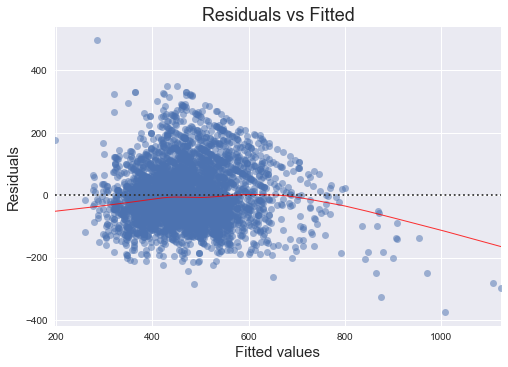

In [58]:
#  Plot
plot = sns.residplot(x=model_fitted_y, y='Prices', data=train_df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

### QQ Plot

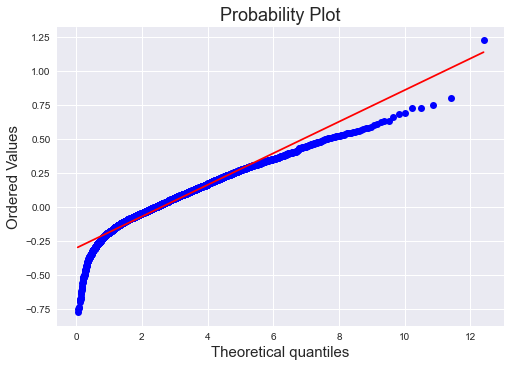

In [59]:
import scipy.stats as stats
#fig = sm.qqplot(model_residuals,fit=True, dist='poisson')
stats.probplot(model_residuals, dist='gamma', sparams=(2.5,), plot=plt)
plt.show()

### Mean absolute percentage error

In [60]:
# Predict using 2025 data.

gamma_predict = gamma_fit.predict(predict_df)
gamma_predict

0       471.779450
1       624.170147
2       532.348932
3       477.929623
4       477.851724
           ...    
4538    491.286031
4539    491.367540
4540    542.166337
4541    542.346885
4542    542.121148
Length: 4543, dtype: float64

In [61]:
mean_absolute_percentage_error(train_df['Prices'], gamma_predict)

0.16375372354553477

## 2. GLM with Poisson Family

In [62]:
# statsmodels glm
pos_fit = glm(
    formula="Prices ~ Bedrooms + Bathrooms + Parkings + \
                popu + Income + hos_count + stop_count + school_count + distance",
    data=train_df, 
    family=families.Poisson()
).fit()

print(pos_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Prices   No. Observations:                 4543
Model:                            GLM   Df Residuals:                     4529
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54506.
Date:                Fri, 07 Oct 2022   Deviance:                       72896.
Time:                        00:17:38   Pearson chi2:                 7.51e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6573      0.180      9.200   

In [63]:
print(pos_fit.aic)

109040.47176147635


### Residual vs Fitted Value Plot

In [64]:
%matplotlib inline

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [65]:
# fitted values (need a constant term for intercept)
model_fitted_y = pos_fit.fittedvalues

# model residuals
model_residuals = pos_fit.resid_deviance

# normalized residuals
#model_norm_residuals = fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
#model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = pos_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = pos_fit.get_influence().cooks_distance[0]

Text(0, 0.5, 'Residuals')

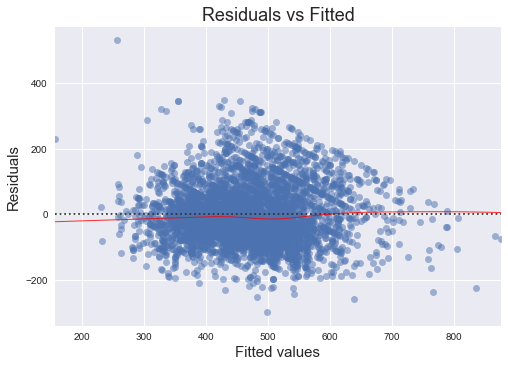

In [66]:
#  Plot
plot = sns.residplot(x=model_fitted_y, y='Prices', data=train_df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

### QQ Plot

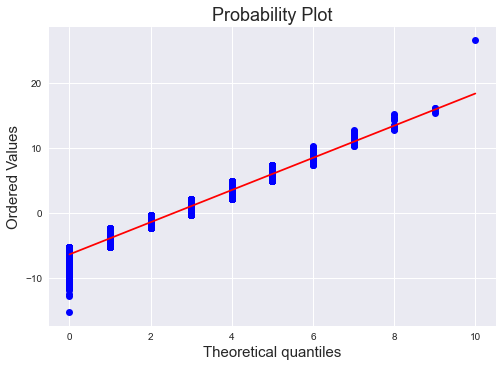

In [67]:
import scipy.stats as stats
#fig = sm.qqplot(model_residuals,fit=True, dist='poisson')
stats.probplot(model_residuals, dist='poisson', sparams=(2.5,), plot=plt)
plt.show()

### Mean absolute percentage error

In [68]:
# Predict using 2025 data.

pos_predict = pos_fit.predict(predict_df)
pos_predict

0       479.414965
1       616.530450
2       537.004458
3       485.127804
4       485.065327
           ...    
4538    483.343569
4539    483.491872
4540    541.576460
4541    541.624446
4542    541.446728
Length: 4543, dtype: float64

In [69]:
mean_absolute_percentage_error(train_df['Prices'], pos_predict)

0.1628091938310762

## 3. GLM with Gaussian Family

In [70]:
gaus_fit = glm(
    formula="Prices ~ Bedrooms + Bathrooms + Parkings + \
                popu + Income + hos_count + stop_count + school_count + distance",
    data=train_df, 
    family=families.Gaussian()
).fit()

print(gaus_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Prices   No. Observations:                 4543
Model:                            GLM   Df Residuals:                     4529
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                          7738.0
Method:                          IRLS   Log-Likelihood:                -26778.
Date:                Fri, 07 Oct 2022   Deviance:                   3.5045e+07
Time:                        00:17:45   Pearson chi2:                 3.50e+07
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1406.1145    321.994     -4.367   

In [71]:
print(gaus_fit.aic)

53584.01018875337


In [72]:
%matplotlib inline

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [73]:
# fitted values (need a constant term for intercept)
model_fitted_y = gaus_fit.fittedvalues

# model residuals
model_residuals = gaus_fit.resid_deviance

# normalized residuals
#model_norm_residuals = fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
#model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = gaus_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = gaus_fit.get_influence().cooks_distance[0]

### Residual vs Fitted Value Plot

Text(0, 0.5, 'Residuals')

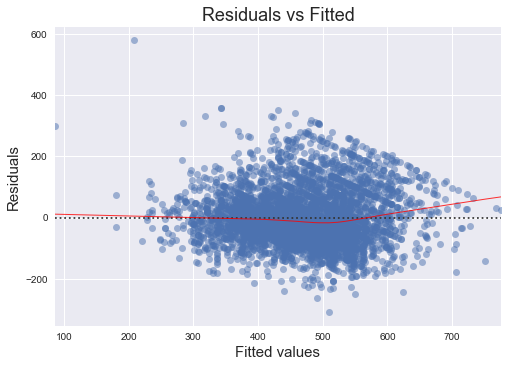

In [74]:
#  Plot
plot = sns.residplot(x=model_fitted_y, y='Prices', data=train_df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

### QQ Plot

/Users/kitty/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


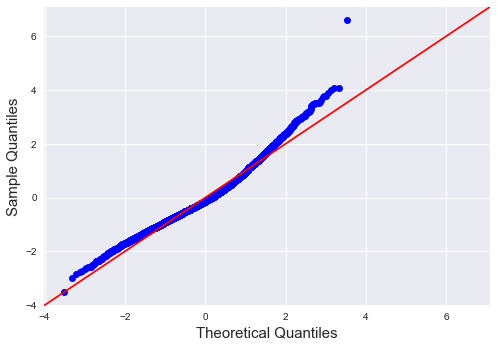

In [75]:
fig = sm.qqplot(model_residuals,line='45', fit=True)
plt.show()

### Mean absolute percentage error

In [76]:
# Predict using 2025 data.

gaus_predict = gaus_fit.predict(predict_df)
gaus_predict

0       487.156274
1       606.400482
2       538.915545
3       492.309404
4       492.264729
           ...    
4538    476.724937
4539    476.925724
4540    540.003028
4541    539.969995
4542    539.830724
Length: 4543, dtype: float64

In [77]:
mean_absolute_percentage_error(train_df['Prices'], gaus_predict)

0.16364947868566032

## \# Penalty Regression

## Ridge Regression

In [116]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
X_train = pd.read_csv('../data/curated/X_train.csv')
y_train = pd.read_csv('../data/curated/y_train.csv')
X_test = pd.read_csv('../data/curated/X_valid.csv')
y_test = pd.read_csv('../data/curated/y_valid.csv')
X_pred = pd.read_csv('../data/curated/X_predict.csv')

X_train = X_train.drop(['Unnamed: 0', 'Unnamed: 0.1'],  axis = 1)
X_test = X_test.drop(['Unnamed: 0', 'Unnamed: 0.1'],  axis = 1)
X_pred = X_pred.drop(['Unnamed: 0', 'Unnamed: 0.1'],  axis = 1)
y_train = y_train.drop(['Unnamed: 0'],  axis = 1)
y_test = y_test.drop(['Unnamed: 0'],  axis = 1)

print('The shape of x train is', X_train.shape)
print('The shape of y train is', y_train.shape)
print('The shape of x valid is', X_test.shape)
print('The shape of y valid is', y_test.shape)
print('The shape of x prediction is', X_pred.shape)

The shape of x train is (3634, 13)
The shape of y train is (3634, 1)
The shape of x valid is (909, 13)
The shape of y valid is (909, 1)
The shape of x prediction is (4543, 13)


In [118]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [119]:
# Cross validation for choosing the best parameter.

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.015269277544167062

In [120]:
# Train the ridge model using the parameter we derived.

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))
mean_absolute_percentage_error(y_test, ridge.predict(X_test))

0.14544450170946527

In [121]:
ridge.coef_

array([[-3.53756899e-02,  4.47076588e+01,  6.45727295e+01,
         6.50904409e+00, -6.34732724e-07, -1.49085902e+01,
         8.01848377e+00, -6.72858250e-04,  2.74832858e-03,
         3.31847696e+00,  7.04613181e+00, -1.76577270e+00,
        -2.87850776e-02]])

In [122]:
# Predict the prices

ridge_pred = ridge.predict(X_pred)

In [123]:
ridge_pred

array([[481.01734932],
       [603.33665954],
       [532.20539829],
       ...,
       [543.36480066],
       [543.35292455],
       [543.21514369]])

## Lasso Regression

In [125]:
# Cross validation for choosing the best parameter.

lasso = Lasso(max_iter = 10000, normalize = True)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso = lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))
mean_absolute_percentage_error(y_test, lasso.predict(X_test))

/Users/kitty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.14539753535649155

In [126]:
lasso.coef_

array([-3.55504964e-02,  4.52505974e+01,  6.48444550e+01,  6.04809835e+00,
       -5.94562952e-07, -1.49267488e+01,  7.96518621e+00, -6.38191984e-04,
        2.79761189e-03,  3.32162346e+00,  6.73906925e+00, -1.73015614e+00,
       -2.37215156e-02])

In [127]:
# Predict the prices

lasso_pred = lasso.predict(X_pred)

In [128]:
lasso_pred

array([481.41604594, 603.62625837, 532.68463009, ..., 544.81839851,
       544.79650804, 544.65855887])